# Lab One: Visualization and Data Preprocessing
### Laura Ahumada, Kevin Boyd, Shikha Pandey, Duy Nguyen
##### Southern Methodist University
##### Fall, 2022

# Business Understanding

+ What determines a person's income? Our first project for the Machine Learning course in the DataScience@SMU program was to perform high-level analysis with a data set of our choosing, which we chose the Adult Census Income data set. This data set was extracted from the U.S Census Bureau by Bary Becker in 1994 and is widely used on the Kaggle website. We used this data to better understand the factors that influence a person having an income of either more or less than $50,000.

+ Some of the specific relations that we looked at are the statistical significances between sex versus income, and race versus income. We performed a *chi-squared test* and used it's p-value to assess and confirm the mentioned above. Another aspect that we looked at, is despite how a person can't change their gender, race and age, we should be able to see what specific education level and other achievable factors, with their specific race, age or sex, could help a person to get an income of more than $50k. A *two-way ANOVA* was conducted to validate that and check for statistical significance. A *PCA* was also conducted to reduce dimensions and visualize the data.

+ Given the results of these hypotheses, they can help us find the societal gaps the government should address while also giving us an idea of the important factors that can influence a person's income.

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

In [2]:
# Get current directory
os.path.dirname(os.path.realpath('__file__'))

'C:\\Users\\dnguy\\Desktop\\1 Machine Learning\\Group Lab 1'

In [3]:
# Import file
df=pd.read_csv("adult.csv")

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Understanding

# Meaning and Type of Data
+ The original data consists of 32,561 entries/rows and 14 attributes/columns, with 1 class variable being "income".


| Attribute | Description | Type | Values | 
| --- | --- | --- | --- |
| age | The age of this person. | *Continuos Ratio* | `17 - 90` 
| workclass | The employment status of this person. | *Discrete Nominal* | `Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked`
| fnlwgt | The final weight of how many people this person represents. | *Continuous Ratio* | `12,285 - 1,484,705` 
| education | The highest level of education this person has achieved. | *Discrete Ordinal* | `Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool` 
| education.num | Numerical form of the highest level of education this person achieved. | *Discrete Ordinal* | `1 - 16` 
| marital.status | The marital status of this person. `Married-civ-spouse` corresponds to civilian spouse. `Married-AF-spouse` corresponds to an Armed Forces spouse. | *Discrete Nominal* | `Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse` 
| occupation | The general type of occupation of this person. | *Discrete Nominal* | `Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces` 
| relationship | The relation that this person identifies as in their immediate family. | *Discrete Nominal* | `Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried` 
| race | The race of this person. | *Discrete Nominal* | `White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black` 
| sex | The biological sex of this person. | *Discrete Nominal* | `Female, Male` 
| capital.gain | Capital gains of this person. | *Continuous Ratio* | `0 - 99,999` 
| capital.loss | Capital loss of this person. | *Continuous Ratio* | `0 - 4,356` 
| hours.per.week | The number of hours this person reports to work per week.| *Continuous Ratio* | `1 - 99` 
| native.country | The country of origin of this person. | *Discrete Nominal* | `United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands` 
| income | The logistic classification of this person based on their income. | *Discrete Ordinal* | `<=50k, >50k` 


In [6]:
# Peeking at the first 5 rows of the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


+ Since we can see a few question marks (?) in the data, we will address these as missing values later.

In [7]:
# Peeking at the last 5 rows of the data
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Quality

### Missing Values
+ As mentioned earlier, question marks (?) are assumed to be entered as missing values in columns "workclass", "occupation" and "native.country".

In [8]:
df.isin(['?']).sum(axis=0) * 100 / len(df)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [9]:
# FOR-LOOP
# Other than the question marks (?), this for-loop counts incorrect values based on the 
# assumption that they have less than 2 characters
# Returns a list of characters that are found
# Otherwise, return []

counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'Incorrect Count': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["Incorrect Count"]!=0]

{'[]', "['?']"}


,Column,Incorrect Count
0,workclass,1836
3,occupation,1843
7,native.country,583


+ Despite the question marks (?) taking around 5% of their respective columns "workclass", "occupation" and "native.country", they were not removed due to the following reason: Census data is collected by census-takers knocking on doors and will either ask or let citizens volunteeringly write down the answer of questions about their workclass, occupation and native country, and the people may not want to report those 3 things to the government. However their incomes were still reported so it's best to treat those missing values as another category and replace them with "Unknown".

In [10]:
# Replacing question marks (?) with "Unknown"
df[['workclass','occupation','native.country']] = df[['workclass','occupation','native.country']].replace({'?':'Unknown'})


In [11]:
df.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


+ The first 5 rows of the data no longer have question marks (?). (DN)

In [12]:
# Checking for missing values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Duplicates

In [13]:
df[df.duplicated()].count()

age               24
workclass         24
fnlwgt            24
education         24
education.num     24
marital.status    24
occupation        24
relationship      24
race              24
sex               24
capital.gain      24
capital.loss      24
hours.per.week    24
native.country    24
income            24
dtype: int64

+ There were 24 duplicate entries found but these will be kept in the data as it would make sense to have a small amount of people out of over 30,000 people that share the exact same categories considering the ones that we're working with.

### Outliers

In [14]:
numdf = df._get_numeric_data()

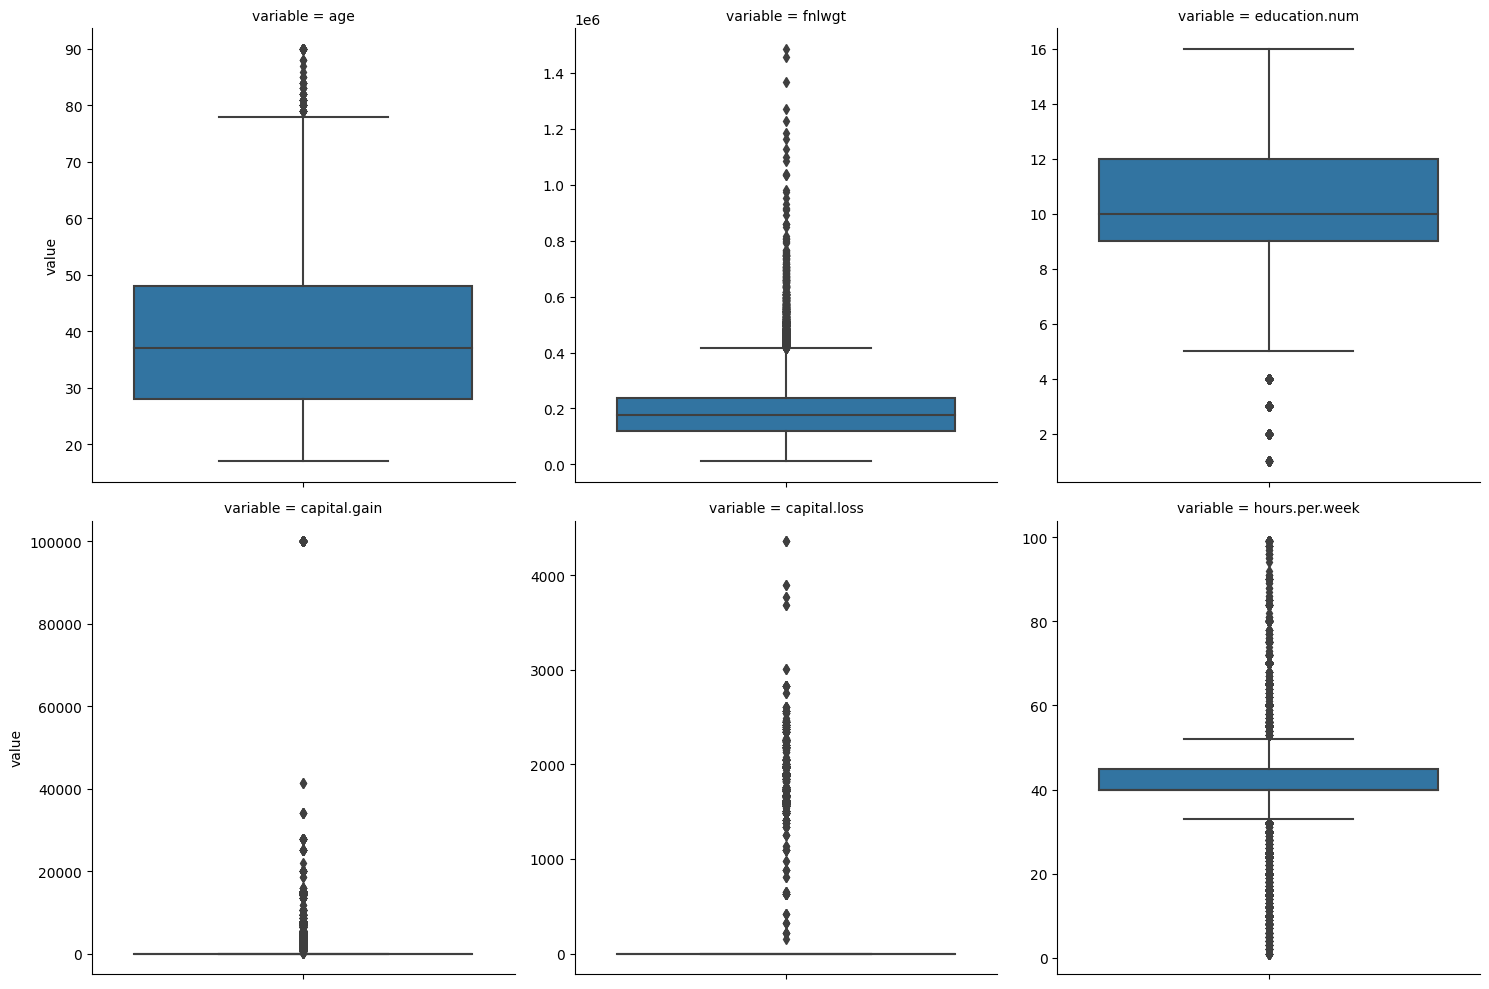

In [15]:
sns.catplot(y='value', col='variable', sharey=False, col_wrap=3, 
            data=numdf.melt(), kind='box')
plt.show()

+ For most numeric data sets related to census like this one, there is bound to be outliers from variables that seem destructive when removed like age.
+ However, the one lone entry from "capital.gain" observed above needs to be carefully dealt with since its value of 99,999 is very suspicious and very far from the rest of the values of "capital.gain".
+ That does not validate its removal however, not until we create a regression model and plotted its residuals to match any outliers with said lone entry, then we can make the final decision to remove it.
+ In general, any values considered as outliers in our numeric variables seemed plausible and do not look like misreported data, therefore none was removed for now.

 #  Additional Variables
+ We saw that splitting both "age" and "hours.per.week" into categories might be beneficial to visualization and further analyses. 

In [49]:
df.loc[df['income'] == '<=50K', ['age']].value_counts().sort_index()

age
17     395
18     550
19     710
20     753
21     717
      ... 
85       3
86       1
87       1
88       3
90      35
Length: 73, dtype: int64

In [51]:
df.loc[df['income'] == '>50K', ['age']].value_counts().sort_index()

age
19      2
21      3
22     13
23     12
24     31
       ..
80      2
81      3
83      2
84      1
90      8
Length: 65, dtype: int64

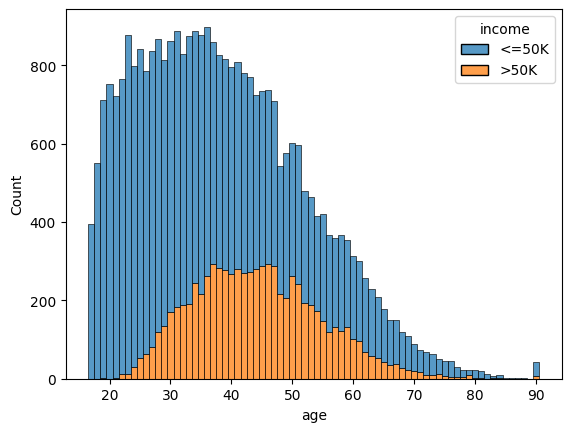

In [66]:
sns.histplot(data=df, x="age", hue="income", multiple="stack", discrete=True, palette="tab10")
plt.show()

+ We decided not to split age into seperate categories since we're losing lots of info and testing power that we're missing out on compared to the original "age" variable.

In [62]:
df['hours.per.week'].value_counts().sort_index()

1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Name: hours.per.week, Length: 94, dtype: int64

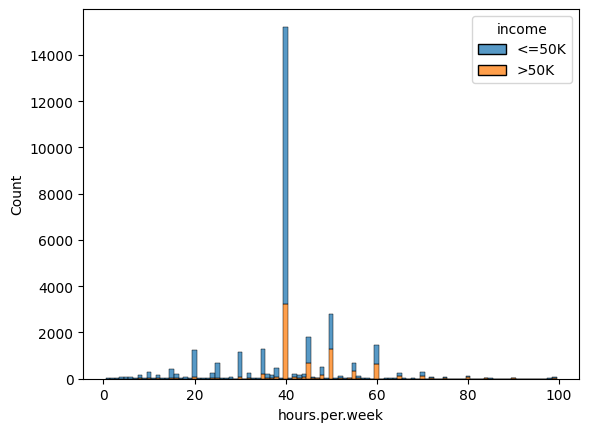

In [85]:
sns.histplot(data=df, x="hours.per.week", hue="income", multiple="stack", discrete=True, palette="tab10")
plt.show()

+ Splitting "hours.per.week" into categories cannot be good either because we'll be losing out on a lot of info.

+ We also assumed that it might be beneficial to combine "capital.gain" and "capital.loss" into a single variable called "net_capital.

In [91]:
# Capital gain mostly have all 0 and one huge outlier 99999
df["net_capital"]=df["capital.gain"]-df["capital.loss"]

In [92]:
# Drop variables now that information is saved in net_capital
df=df.drop(columns=["capital.loss","capital.gain"])

In [95]:
# Making sure newly made attributes are objects to match the rest
# Appropriate variables will be changed to category later
for i in df.select_dtypes(include=['category']).columns:
    df[i]= df[i].astype("object")

In [96]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
native.country    object
income            object
net_capital        int64
dtype: object

# Simple, Appropriate Statistics

| Continuous Variable | Range | Mean | Median | Mode | Variance |
| --- | --- | --- | --- | --- | --- |
| age | (17,90) | 38.581647 | 37 | 36 | 186.061
| fnlwgt | (1228.5,1484705) | 189778 | 178356 | 164190 & 203488 | 1.114E10
| education.num | (1,16) | 10.081 | 10 | 9 | 6.619
| capital.gain | (0,99999) | 1077.649 | 0 | 0 | 5.454E7
| capital.loss | (0,4356) | 87.304 | 0 | 0 | 1.624E5
| hours.per.week | (1,99) | 40.437 | 40 | 40 | 152.459

The summary statistics for our numeric variables can be further described below: 
+ This points out again how Net capital median 0 while the mean is 990 which shows how skewed this variable is.
+ We can see that age has a more normal distribution, with a mean of 38 years.(SP - added s , removed old)
+ Hours per week also has a normal distribution with mean of 40 hours and median of 40 hours.
+ For education.num we can see that it also has normal distribution with a mean of 10 and median of 10.(SP - removed is, added has)
+ the fnlwgt also seems to have somewhat normal distribution with a mean and median around 180,000	

***Significance***
+ These statistics are important because they tell us about the distribution of the data. It can help us point out outliers, incorrect data, and the range of the continuous variables. This could also help us check assumption of normality for any downstream analysis
+ The following 3 lines of code were used to create the table above.

In [97]:
df.describe()

,age,fnlwgt,education.num,hours.per.week,net_capital
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456,990.345014
std,13.640433,1.055500e+05,2.572720,12.347429,7408.986951
min,17.000000,1.228500e+04,1.000000,1.000000,-4356.000000
25%,28.000000,1.178270e+05,9.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,99999.000000


In [98]:
df.mode(numeric_only=True)

,age,fnlwgt,education.num,hours.per.week,net_capital
0,36.0,123011,9.0,40.0,0.0
1,NaN,164190,NaN,NaN,NaN
2,NaN,203488,NaN,NaN,NaN


+ It looks like "fnlwgt" has 3 modes, where values "123011", "164190" and "203488" are the most likely to be predicted amongst other values.

In [99]:
df.var(numeric_only=True)

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
hours.per.week    1.524590e+02
net_capital       5.489309e+07
dtype: float64

# Visualizations

# Continuous Data Distribution
+ "age" is a right skewed 
+ "hours.per.week" seems somewhat normally distributed
+ "net_capital" is heavily right-skewed, with 87% of it being 0. This does not validate the removal of this newly made attribute because it still has a noticeable amount of variance.

In [113]:
df[df['net_capital'] == 0].shape[0] / df.shape[0]

0.8700592733638401

age


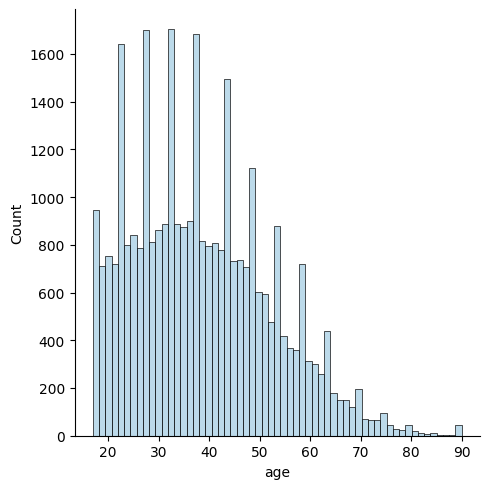

fnlwgt


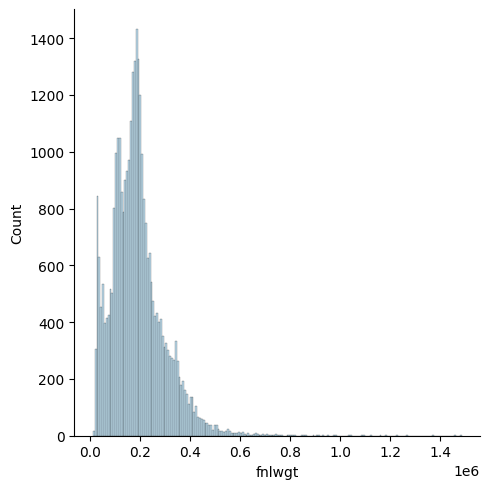

education.num


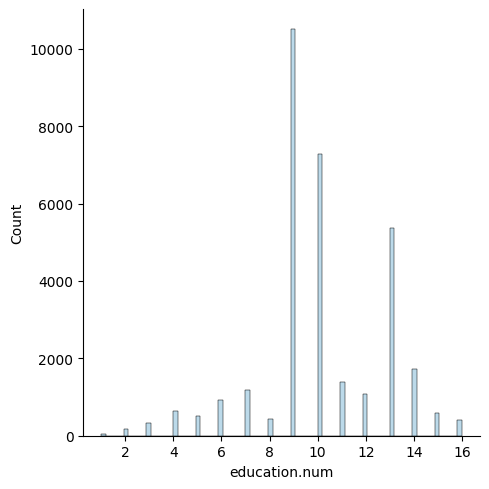

hours.per.week


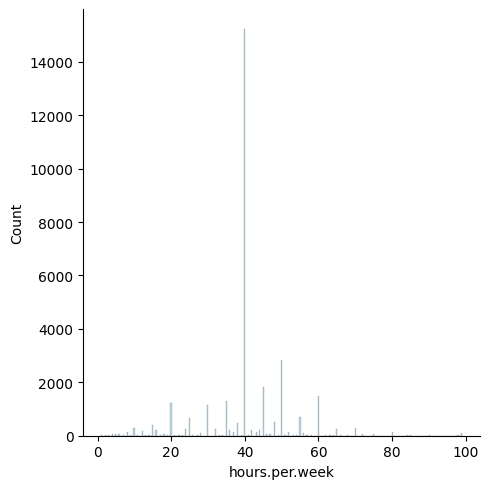

net_capital


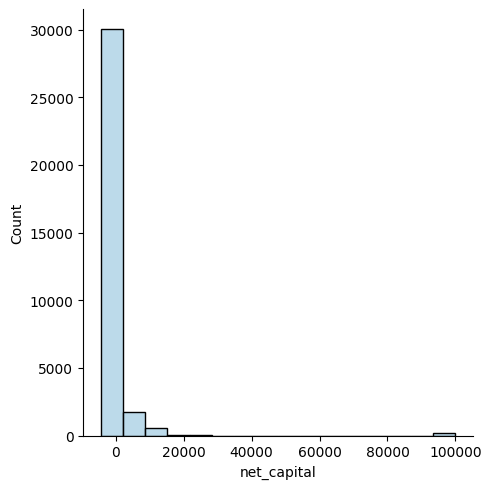

In [123]:
# for future plots
# Creating df of only Categorical variables 
cat_df=df.select_dtypes(include=['object'])

# Creating df of only Continuous variables
num_df = df._get_numeric_data()
sns.set_palette("Paired")
for i in list(num_df):
    print('\033[1m' + i) #(SP - Added '\033[1m' + to inside parentheses to bold variabe name,completely optional!!)
    sns.displot(df[i], kde=False)
    plt.show()

# Categorical Data Distribution

In [166]:
df['workclass'].value_counts(normalize=True)[0:1] * 100

Private    69.703019
Name: workclass, dtype: float64

In [161]:
df['education'].value_counts(normalize=True)[0:4] * 100

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Name: education, dtype: float64

In [163]:
df['marital.status'].value_counts(normalize=True)[0:2] * 100

Married-civ-spouse    45.993673
Never-married         32.809189
Name: marital.status, dtype: float64

In [164]:
df['occupation'].value_counts(normalize=True)[0:3] * 100

Prof-specialty     12.714597
Craft-repair       12.588680
Exec-managerial    12.487331
Name: occupation, dtype: float64

+ 69.7% work in private companies.
+ 32.25% are highschool grads, 22.39% have some college education, and 16.44% have a Bachelor's degree. Only 5.29% have a Master's degree.
+ 46% of people entered in the data are married to a civillian, and 32.8% have never married.
+ The 3 occupation categories of professional specialty, craft repair, and executive managerial each represent 12% of all occupations.

In [167]:
df['relationship'].value_counts(normalize=True)[0:1] * 100

Husband    40.517797
Name: relationship, dtype: float64

In [168]:
df['race'].value_counts(normalize=True)[0:1] * 100

White    85.427352
Name: race, dtype: float64

+ 40.52% of people entered in the data are husbands, while only 4% are wives. This tells us that the husband is usually the one opening the door when US Census knocks on their door.
+ 85.43% of people are white.

In [143]:
df['sex'].value_counts(normalize=True) * 100

Male      66.920549
Female    33.079451
Name: sex, dtype: float64

+ 66.92% of people are males. This was contradicting the husbands versus wives distribution, so we digged deeper.

In [180]:
df.loc[df['relationship'] == 'Husband', ['sex']].value_counts().sort_index()

sex   
Female        1
Male      13192
dtype: int64

In [177]:
df.loc[df['relationship'] == 'Wife', ['sex']].value_counts().sort_index()

sex   
Female    1566
Male         2
dtype: int64

+ It seems like there are mistakes entered into the data but they are very minimal.

In [169]:
df['native.country'].value_counts(normalize=True)[0:1] * 100

United-States    89.585701
Name: native.country, dtype: float64

+ Almost 90% of people are native to the U.S., while 10% are from another country.

In [145]:
df['income'].value_counts(normalize=True) * 100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

+ About a quarter of our population makes over $50,000.

##### The distributions of our categorical variables are shown below.

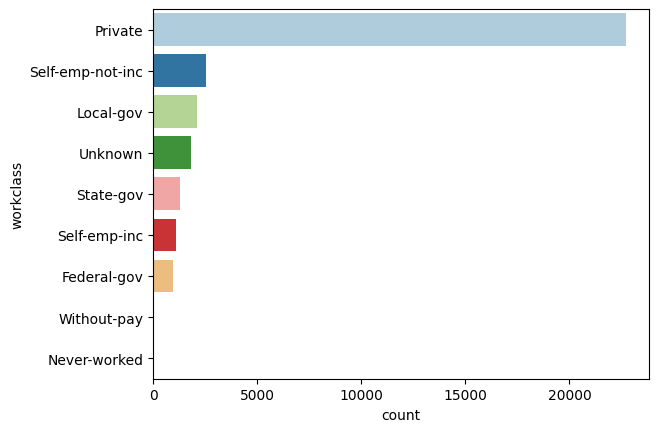

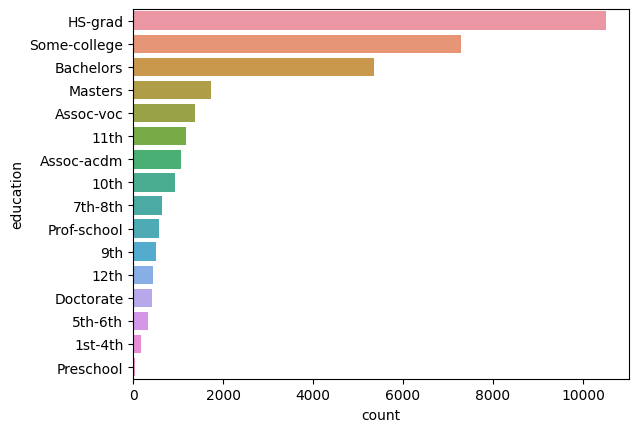

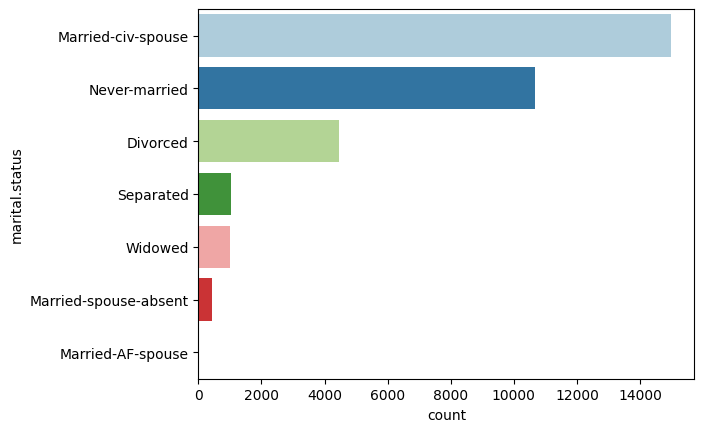

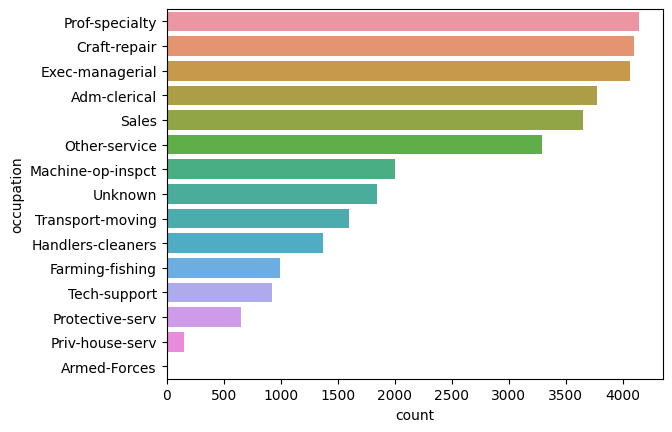

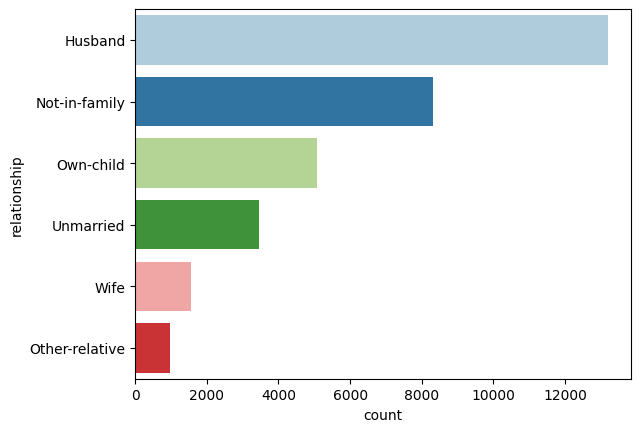

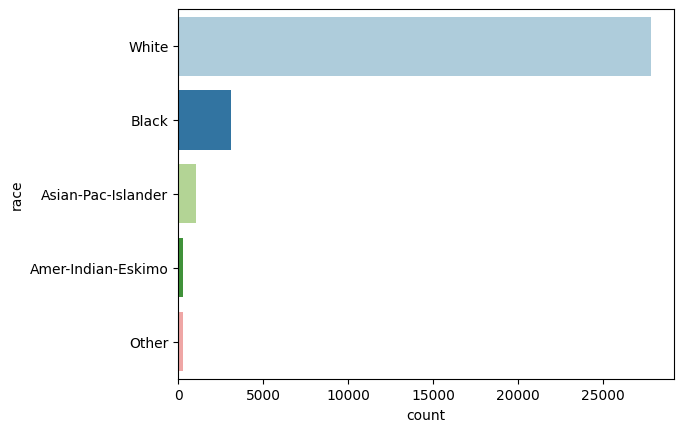

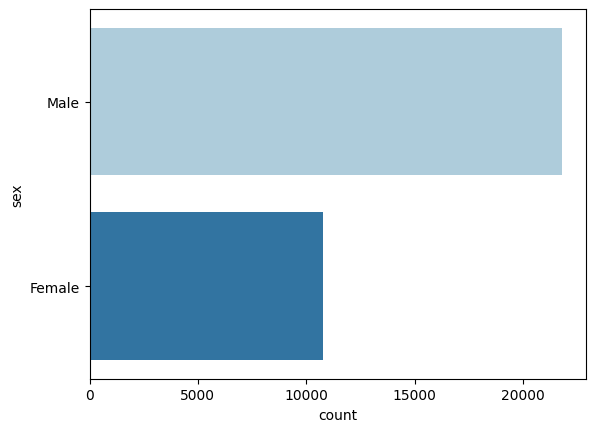

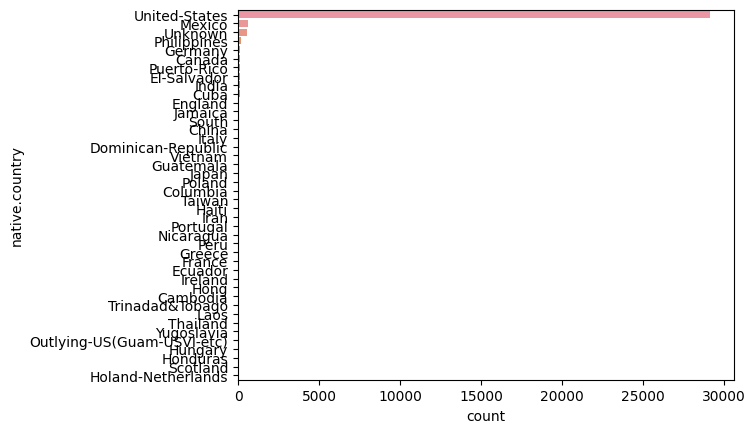

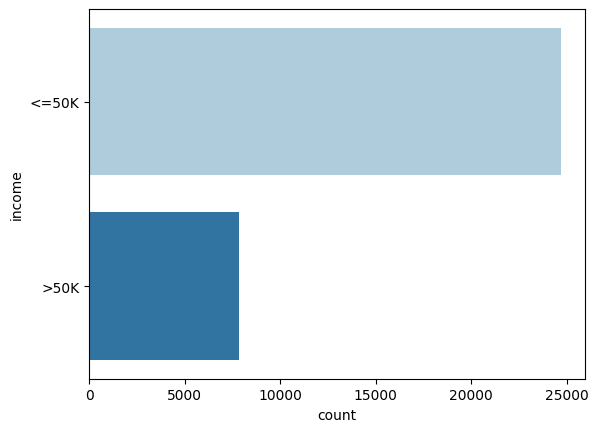

<Figure size 640x480 with 0 Axes>

In [135]:
sns.set_palette("Paired")
# Checking the distribution for each factor
for i in cat_df.columns:
    sns.countplot( y= i, data = df, orient= 'h',
    order=df[i].value_counts().index)
    plt.figure()
plt.show()

# Multivariate Analysis

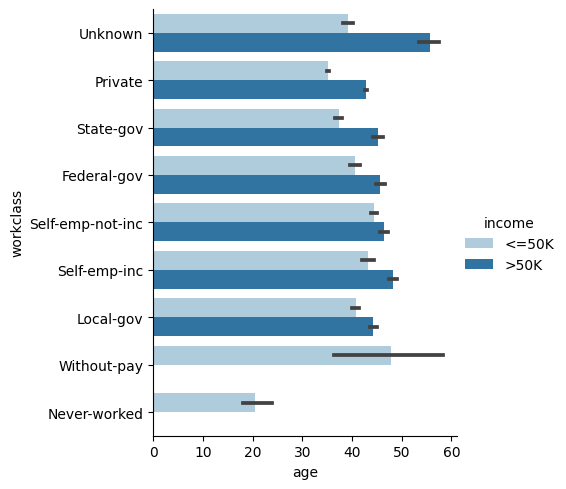

In [190]:
sns.set_palette("Paired")
sns.catplot(x="age", y="workclass", hue="income", kind="bar", data=df)
plt.show()

+ In all categories people that make over 50K are generally older. 
+ We see that people who never worked are all under 30 years old and make under 50k. 
+ The age range for people witout pay is higher than people who never worked and they also make under 50k.

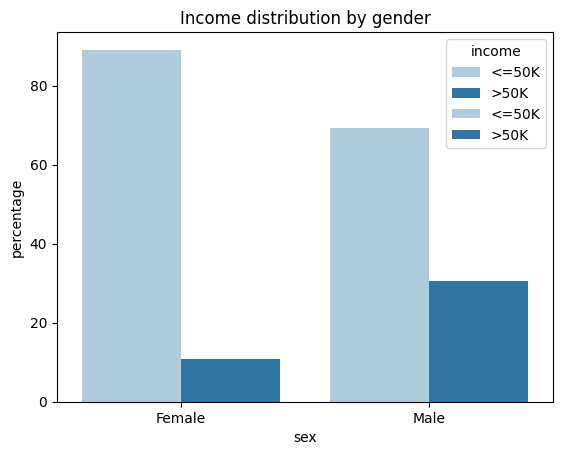

In [185]:
sns.set_palette("Paired")
x, y, hue = "sex", "percentage", "income"
(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue).set(title='Income distribution by gender'))
plt.show()

### Based on the large gap seen above between the distributions of males versus females by income, we investigated deeper into any other variables that relates to "sex" and "income".

+ With "income" as the target, "marital.status" does seem to have a difference on female and male making more than $50,000.

+ For both male and female Married-AF-Spouse and Married-civ-spouse have the very similar percent for obtaining more or less than $50,000.

+ However in the rest, there is large gap having female with the lowest percentage of making more than $50,000.

In [198]:
a=pd.crosstab([df["marital.status"],df["sex"]],df["income"],
           normalize='index')

sorted_df = pd.DataFrame(a.sort_values(by = ['>50K'], ascending = [False]))
sorted_df

income                           <=50K      >50K
marital.status        sex                       
Married-civ-spouse    Female  0.544961  0.455039
                      Male    0.554171  0.445829
Married-AF-spouse     Male    0.555556  0.444444
                      Female  0.571429  0.428571
Widowed               Male    0.767857  0.232143
Divorced              Male    0.839639  0.160361
Separated             Male    0.875635  0.124365
Married-spouse-absent Male    0.892019  0.107981
Divorced              Female  0.933009  0.066991
Widowed               Female  0.944242  0.055758
Never-married         Male    0.945064  0.054936
Married-spouse-absent Female  0.946341  0.053659
Never-married         Female  0.965177  0.034823
Separated             Female  0.973059  0.026941


### Just male distribution of all variables and just female distribution of all variables to see diferences

#### Similar
+ For working 78% females works on private companies while 71% of man work on private
+ ***For excecutivte managerial 11% for female while 13% for men.***
+ Sales is another occupation that is similar 11% male while 12% female
+ From all females 89% are from US and from all males 89% are males
+ Out of females 54% are middle age  and for males the same
+ For highschoool grad in their category they make up about the same 32% vs 31%
+ Males and females do have about the same % of bachelors - 17% male and 15% female (SP - minor edit)
+ Out of females 5% have Masters and its the same for males
+ ***Education seems similar when taking into account the discrepancy of male and female distribution in the data*** (SP - little confused!!)
 
#### Big differences
+ 61% males are married with spouse while only 15% females are married
+ More women have never been married 44% vs only 26% of men have never been married (SP - minor edit)
+ Only 8% men are divorced while 25% women are divorsed (SP - fixed typos)
+ 20% of females own child while only 12% males own child even though their marriage % is higher (SP - rephrased)
+ 88% of males are white and 80% of females are white (SP - changed women to females)
+ Out of males 31% make more than 50k while out of females only 11% make more than 50k (SP - used more than, changed to 50 for female)
+ Out of females 65% work fulltime compared to males 55% work full time, however out of males 32% do overtime while out of females they only do 15% (SP - changed, removed words)


***Only Marital.status, relationship and education results are different when filtering by gender***

***By percent***

In [199]:
for i in cat_df.columns:
    print(i.upper())
    print("--------MALE--------")
    print(df[df["sex"]=="Male"][i].value_counts(normalize=True).mul(100).round(1))
    print("--------FEMALE--------")
    print(df[df["sex"]=="Female"][i].value_counts(normalize=True).mul(100).round(1))
    print()

WORKCLASS
--------MALE--------
Private             68.6
Self-emp-not-inc     9.8
Local-gov            5.8
Unknown              4.6
Self-emp-inc         4.5
State-gov            3.7
Federal-gov          3.0
Without-pay          0.0
Never-worked         0.0
Name: workclass, dtype: float64
--------FEMALE--------
Private             72.0
Unknown              7.8
Local-gov            7.8
State-gov            4.5
Self-emp-not-inc     3.7
Federal-gov          2.9
Self-emp-inc         1.3
Without-pay          0.0
Never-worked         0.0
Name: workclass, dtype: float64

EDUCATION
--------MALE--------
HS-grad         32.6
Some-college    20.6
Bachelors       17.1
Masters          5.4
Assoc-voc        4.0
11th             3.4
Assoc-acdm       3.0
10th             2.9
7th-8th          2.2
Prof-school      2.2
9th              1.7
Doctorate        1.5
12th             1.3
5th-6th          1.1
1st-4th          0.6
Preschool        0.2
Name: education, dtype: float64
--------FEMALE--------
HS-grad  

+ Males and Females tend to work around the same amount of hours with a median of 40 hours per week

In [200]:
# A quick glance at the hours per week of work between male and female
#there are a lot more males in the data so graphs show than females work less but lets look at actual numbers
for i in ["Male", "Female"]:
    print("--Hours a week--")
    print("Mean for",i, df[df["sex"]==i]["hours.per.week"].mean())
    print("Median for",i, df[df["sex"]==i]["hours.per.week"].median())
    print("")


--Hours a week--
Mean for Male 42.42808627810923
Median for Male 40.0

--Hours a week--
Mean for Female 36.410361154953115
Median for Female 40.0



### We can see that people that did not graduate from highschool have lower chances for making greater than 50K regardless of sex

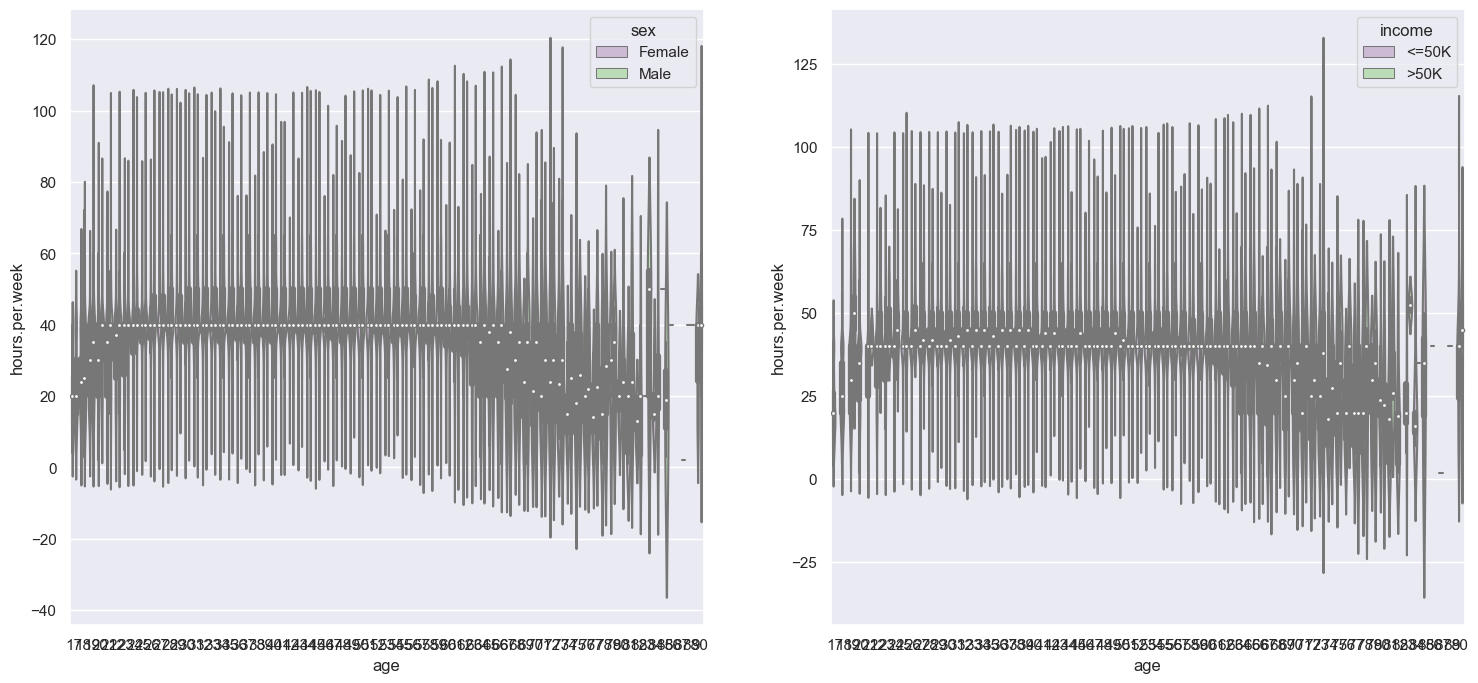

In [206]:
sns.set()
fig, axes = plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot(ax=axes[0], data=df,x='age',y='hours.per.week',hue='sex', 
               kind='violin',ci=95,palette='PRGn',
               height=7)

sns.violinplot(ax=axes[1],x='age',y='hours.per.week',hue='income',data=df, 
               kind='violin',ci=95,palette='PRGn',
               height=7)
plt.show()

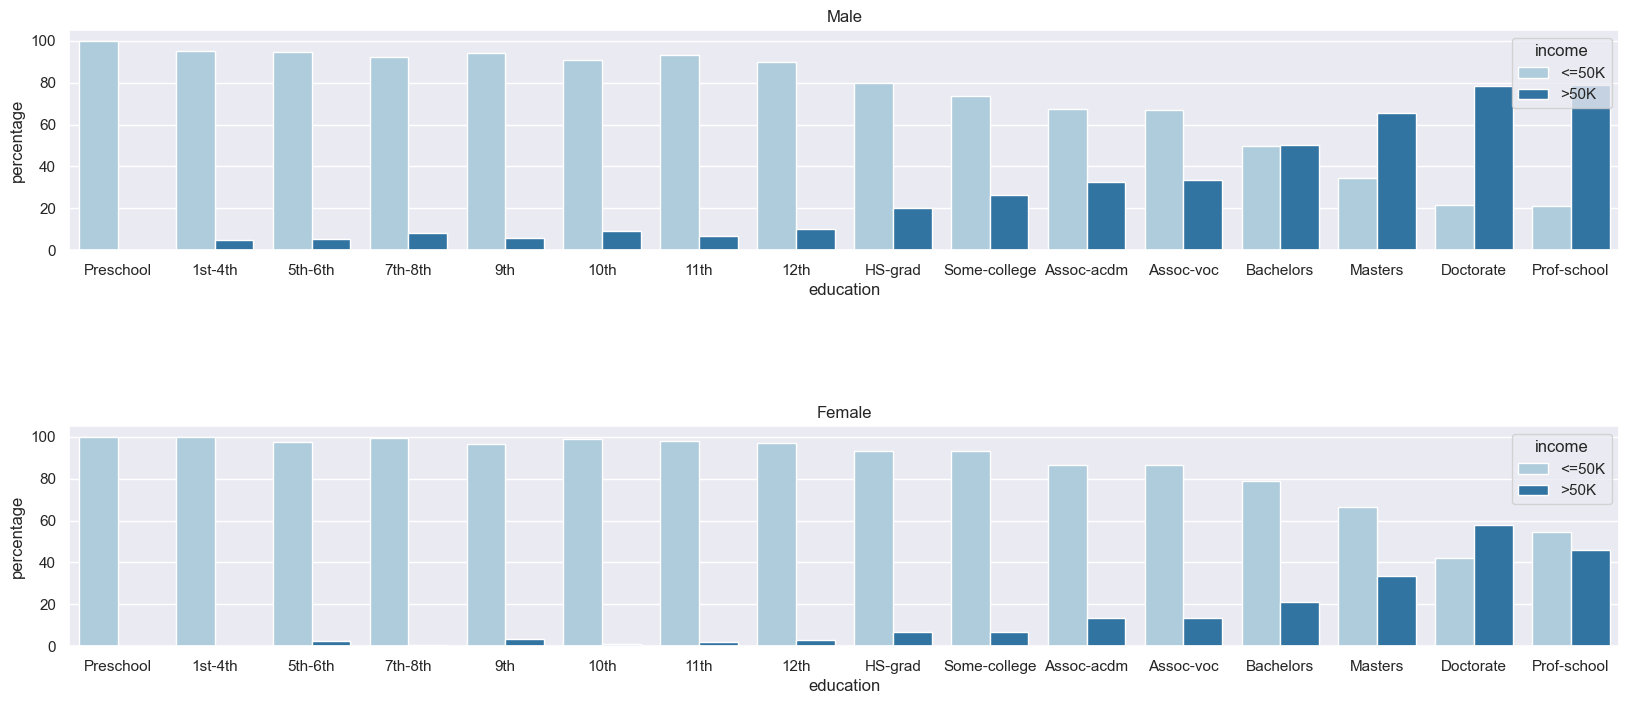

In [210]:
# (SP - changed figsize=(20, 8) instead of figsize=(18, 8) because with plt.xticks(rotation = 45, ha='right')
# it was only doing it for 2nd plot, increasing plot size somewhat works)
# (SP - commented plt.xticks(rotation = 45, ha='right'))
sns.set()
fig, axes = plt.subplots(2, 1,figsize=(20, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.125)

sns.set_palette("Paired")
x, y, hue = "education", "percentage", "income"


educ_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

n=df[df["sex"]=="Male"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order,ax=axes[0])).set(title='Male')
#plt.xticks(rotation = 45, ha='right')

n=df[df["sex"]=="Female"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order ,ax=axes[1])).set(title='Female')
#plt.xticks(rotation = 45, ha='right')
plt.show()

### We can see that the majority of people from 30 to 55 are more likely to have  greater than 50K

In [211]:
sns.set_palette("Paired")
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='age', hue='income', multiple="stack", bins=30)

<AxesSubplot:xlabel='age', ylabel='Count'>

### Both Asian-Pasific-Islander and White people seem to make more than 50K within their race more so than other races.
+ The Asian-Pac-Islander and White race categories both around 25% make more than 50K, and around 74% make less than 50K. (SP - removed of and switched words around)


In [212]:
plt.figure(figsize=(12,6))
sns.set_palette("Paired")
x, y, hue = "race", "percentage", "income"

(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='race', ylabel='percentage'>

In [213]:
sns.set()
sns.set_palette("Paired")
fig, axes = plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot(ax=axes[0], data=df,x='age_class',y='hours.per.week',hue='sex', 
               kind='violin',ci=95,palette='PRGn',
               height=7)

sns.violinplot(ax=axes[1],x='age_class',y='hours.per.week',hue='income',data=df, 
               kind='violin',ci=95,palette='PRGn',
               height=7)

ValueError: Could not interpret input 'age_class'

### Other relations between "relationship" and "marital_status"

+ Something interest that we found was how people with marital status "Married CIV Spouse" have relationship as "Not in Family" that could mean they are seperated. (SP - changes few words) 
+ It was interesting also to see how "Unmarried" and "Not in Family" share the same marital status.

In [216]:
# unmarried is widowed, divorsed, separated, never-married, married spouse absent
df[df["relationship"]=="Unmarried"]["marital_status"].unique()

KeyError: 'marital_status'

In [215]:
df[df["relationship"]=="Not-in-family"]["marital_status"].unique()

KeyError: 'marital_status'

In [ ]:
df[(df["relationship"]=="Not-in-family") & (df["marital_status"]=="Married-civ-spouse")].head()

##### We wished to visualize this but did not due to time limitations. We hope the above should be enough to implement the analysis of this analysis idea.

# Bivariate Analysis for Continuous Variables
+ We can see that if a person has around 46,000 or greater in net capital they make more then 50K.
+ Age for less than 50K is more skewed to right which makes sense because younger people tend to make less money.
+ Hour per week seems to be centered at 40 hours per week which makes sense because that is full time work week.

In [ ]:
# Patterns we see with our response variable
sns.pairplot(df, hue="income", height=2)

### Correlation Plot
+ We do not see high correlation between any of our continuous variables. 
+ We see the highest correlation between education.num and hours per week with a value of 0.15. 
(KB - we did not have this section so I added something)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Extra statistical tests on above some of the above assumptions

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Age and Income Anova

+ We performed an Anova between Income and age to check if there was a statistical significance.
+ We found that there was enough evidence to suggest that mean age of people making  more than 50K is not equal to mean age of people making less than 50K (p-value < 0.001). (KB - changed how we report p-value)


In [ ]:
df.columns # (SP - Do we need this in final copy?)

In [ ]:
# Updating column names (SP - Added comment to show what code is doing)
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'hours_per_week', 'native_country', 'income', 'age_class', 'work_type',
       'net_capital']


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('age ~ C(income)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

In [ ]:
# Tukey
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df, res_var='age', xfac_var='income', anova_model='age ~ C(sex)')
res.tukey_summary

#### Checking assumptions for the Anova test
+ There is not enough evidence to suggest the residuals are not normally distributed based on the residuals plot and the qq plot. (KB - edit)

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Chi-squared test to check if there is a statistical difference between income and sex (KB -edit)
+ There is enough evidence to reject the null hypothesis of males and females having equal income (p_val=0.0000)
+ Based on evidence seen on the EDA we see this discrepancy where males have a higher income.

In [ ]:
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(df.sex, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

#p val o 0.0, Statistical val 1441.4918478416585, df=2

# Chi-squared test to check if there is a statistical difference between income and race (KB - edit)
+ There is strong evidence to reject the null hypothesis that all races have an equal income (p_val=2.266882172058718e-07)

In [ ]:
import scipy

In [ ]:
chisqt = pd.crosstab(df.race, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])


# PCA
+ Finding relationships and dimensionality reduction
+ We do see a cluster on the top right corner grouping only greater than 50K. 
+ We do not see any people that make under 50k at PC1 > 5.
+ There is an overlap of people that make over and under 50k between PC1 = (-2,4)
+ At PC1 <= -2 we only see people that make under 50K.
(KB - edit whole section)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [ ]:

# now let's use PCA to find the two "best" dimensions of this data
# these are linear transforms to help project the features into something more understandable

features = ['age', 'fnlwgt', 'education_num', 'net_capital', 'hours_per_week']

# Separating out the features
x = df.loc[:, features].values
# Separating out the income
y = df.loc[:,['income']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
, columns = ['principal component 1', 'principal component 2'])


finalDfPCA = pd.concat([principalDf, df[['income']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['<=50K', '>50K']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDfPCA['income'] == target
    ax.scatter(finalDfPCA.loc[indicesToKeep, 'principal component 1']
               , finalDfPCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()